In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
import array

In [77]:
def loadDataSet():
    # 创建数据列表
    dataMat = []
    # 创建标签列表
    labelMat = []
    # 打开文件
    fr = open('testSet.txt')
    # 逐行读取
    for line in fr.readlines():
        # 去掉每行两边的空白字符，并以空格分隔每行数据元素
        lineArr = line.strip().split()
        # 添加数据
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # 添加标签
        labelMat.append(int(lineArr[2]))
    # 关闭文件
    fr.close()
    # 返回
    return dataMat, labelMat

In [78]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [79]:
def gradAscent(dataMath, classLabels):
    # 转换成numpy的mat(矩阵)
    dataMatrix = np.mat(dataMath)
    # 转换成numpy的mat(矩阵)并进行转置
    labelMat = np.mat(classLabels).transpose()
    # 返回dataMatrix的大小，m为行数，n为列数
    m, n = np.shape(dataMatrix)
    # 移动步长，也就是学习效率，控制更新的幅度
    alpha = 0.01
    # 最大迭代次数
    maxCycles = 500
    weights = np.ones((n, 1))
    weights_array = np.array([])
    for k in range(maxCycles):
        # 梯度上升矢量化公式
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
        # numpy.append(arr, values, axis=None):就是arr和values会重新组合成一个新的数组，做为返回值。
        # 当axis无定义时，是横向加成，返回总是为一维数组
        weights_array = np.append(weights_array, weights)
    weights_array = weights_array.reshape(maxCycles, n)
    # 将矩阵转换为数组，返回权重数组
    # mat.getA()将自身矩阵变量转化为ndarray类型变量
    return weights.getA(), weights_array

In [80]:
def plotBestFit(weights):
    # 加载数据集
    dataMat, labelMat = loadDataSet()
    # 转换成numpy的array数组
    dataArr = np.array(dataMat)
    # 数据个数
    # 例如建立一个4*2的矩阵c，c.shape[1]为第一维的长度2， c.shape[0]为第二维的长度4
    n = np.shape(dataMat)[0]
    # 正样本
    xcord1 = []
    ycord1 = []
    # 负样本
    xcord2 = []
    ycord2 = []
    # 根据数据集标签进行分类
    for i in range(n):
        if int(labelMat[i]) == 1:
            # 1为正样本
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            # 0为负样本
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    # 新建图框
    fig = plt.figure()
    # 添加subplot
    ax = fig.add_subplot(111)
    # 绘制正样本
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)
    # 绘制负样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)
    # x轴坐标
    x = np.arange(-3.0, 3.0, 0.1)
    # w0*x0 + w1*x1 * w2*x2 = 0
    # x0 = 1, x1 = x, x2 = y
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    # 绘制title
    plt.title('BestFit')
    # 绘制label
    plt.xlabel('x1')
    plt.ylabel('y2')
    # 显示
    plt.show()

随机梯度上升

In [81]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    # 返回dataMatrix的大小，m为行数，n为列数
    m, n = np.shape(dataMatrix)
    # 参数初始化
    weights = np.ones(n)
    weights_array = np.array([])
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 每次都降低alpha的大小
            alpha = 4/(1.0+j+i)+0.01
            # 随机选择样本
            randIndex = int(random.uniform(0, len(dataIndex)))
            # 随机选择一个样本计算h
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            # 计算误差
            error = classLabels[randIndex] - h
            # 更新回归系数
            weights = weights + alpha * error * dataMatrix[randIndex]
            # 添加返回系数到数组中当axis为0时，数组是加在下面（列数要相同）
            # weights_array = np.append(weights_array, weights, axis=0)
            # 删除已使用的样本
            del(dataIndex[randIndex])
    # 改变维度
    weights_array = weights_array.reshape(numIter*m, n)
    # 返回
    return weights.getA(), weights_array


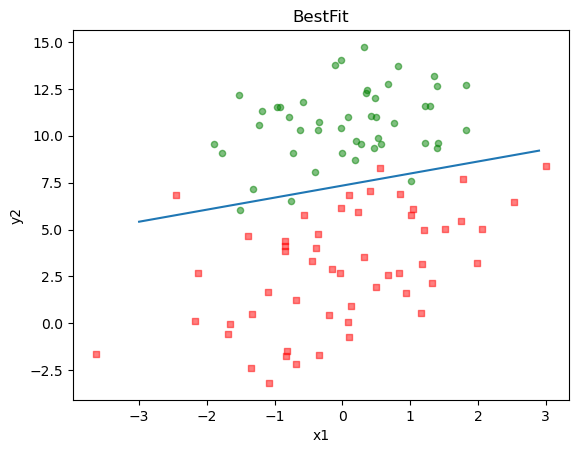

In [82]:
dataArr, labelMat = loadDataSet()
weights1, weights_array = gradAscent(dataArr,labelMat)
plotBestFit(weights1)